In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import pyarrow.parquet as pq

In [ ]:
def sliderPlot(df1,i):
    fig = px.line(df1, y=df1[i] )
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ))
    fig.show()

In [9]:
dframe=pd.read_parquet("D:/Data_Files/NPCL_Data/Pardata.parquet")
df_name=pd.read_excel("D:/Data_Files/NPCL_NAMES.xlsx")

In [7]:
df11=dframe.groupby('sensor')
df21=df_name.groupby('id')

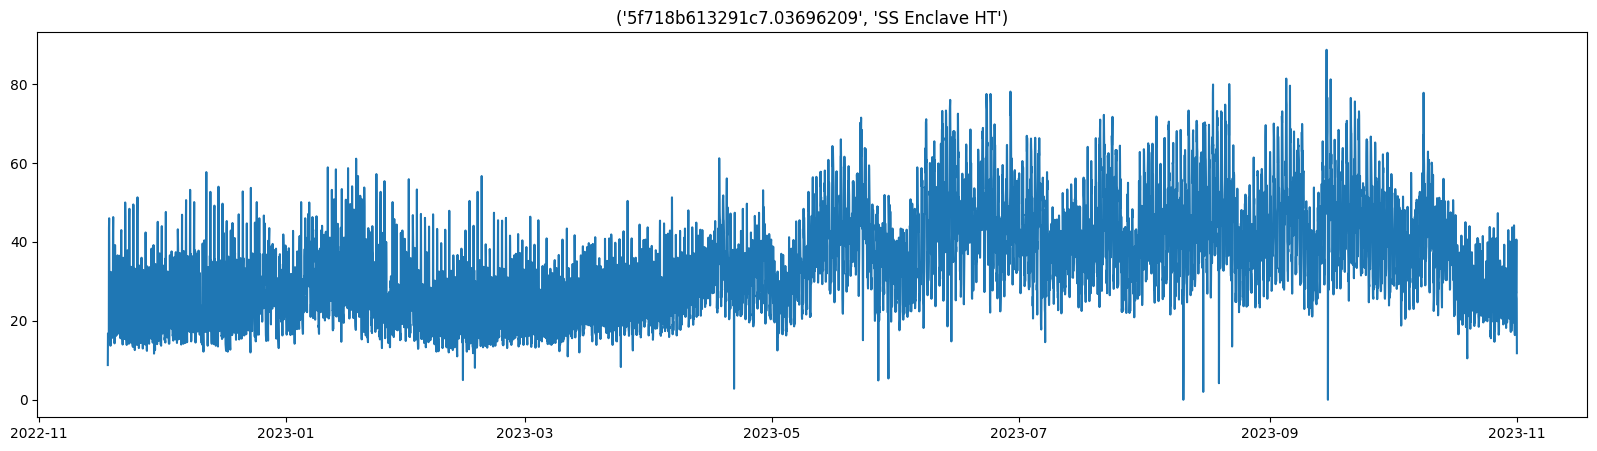

0 zero count= 2 total count= 8353  SS Enclave HT id= 5f718b613291c7.03696209
data  is stationary with score 0.02168929601322926


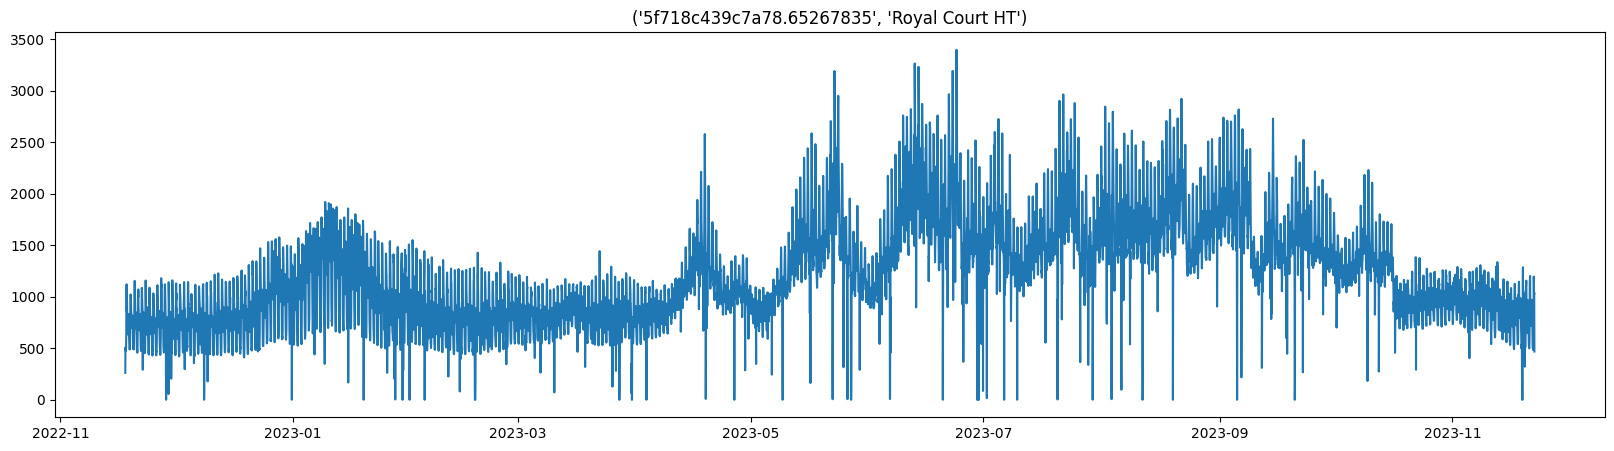

1 zero count= 33 total count= 8869  Royal Court HT id= 5f718c439c7a78.65267835
data  is stationary with score 0.02896475934178374


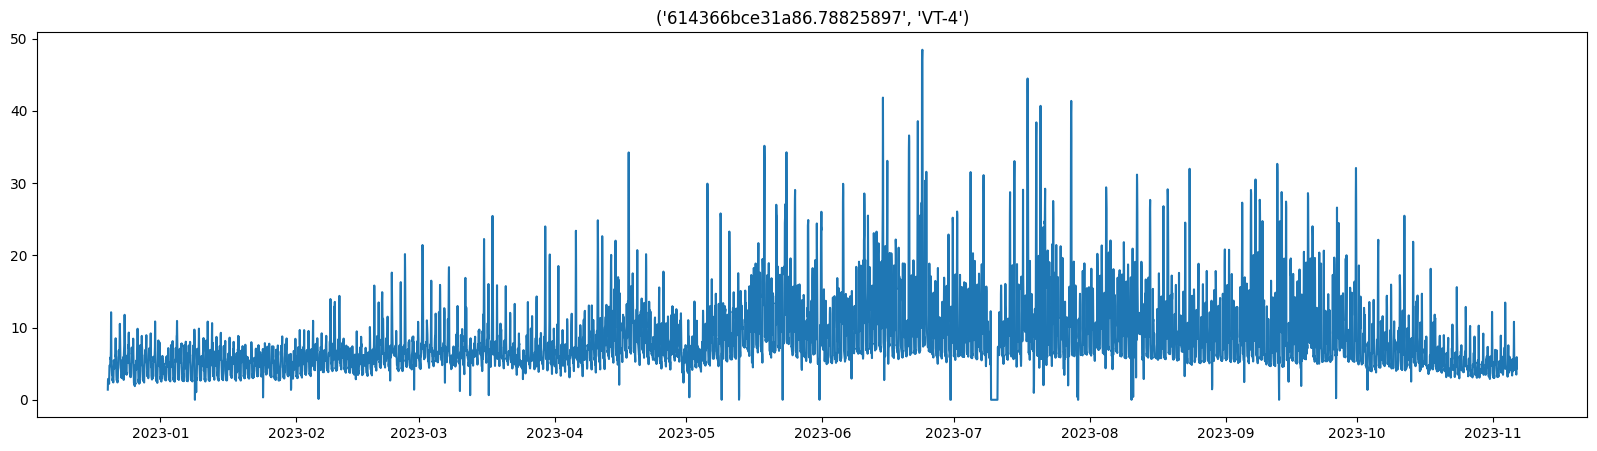

2 zero count= 48 total count= 7716  VT-4 id= 614366bce31a86.78825897
data  is stationary with score 5.254098320616729e-10


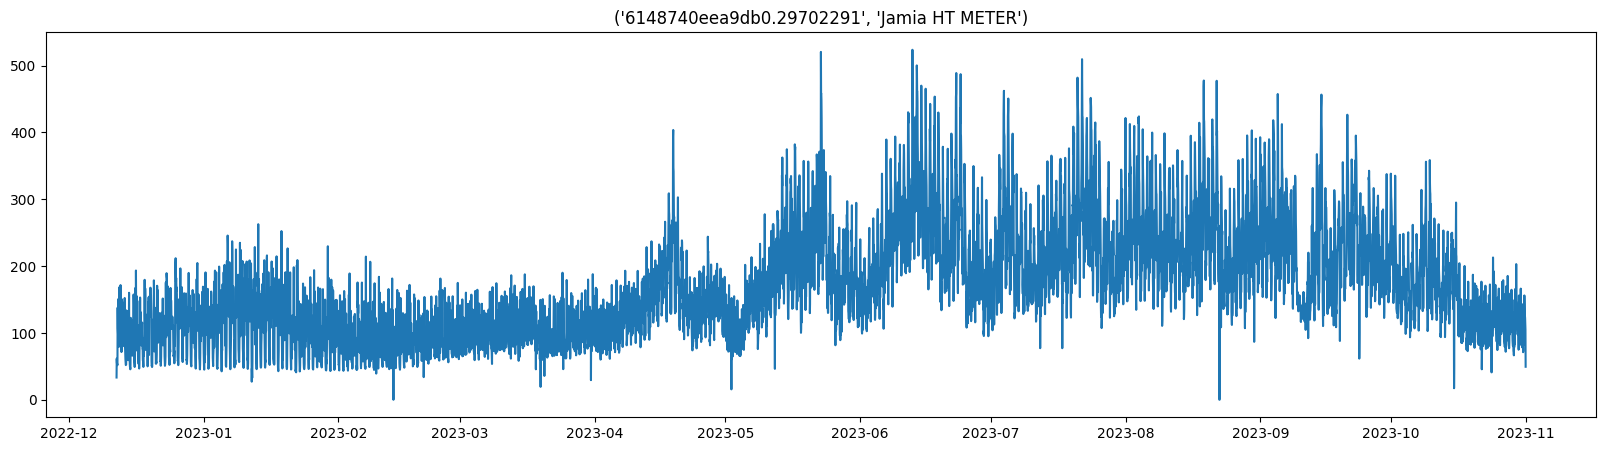

3 zero count= 3 total count= 7777  Jamia HT METER id= 6148740eea9db0.29702291
data  is stationary with score 0.014836561154433731


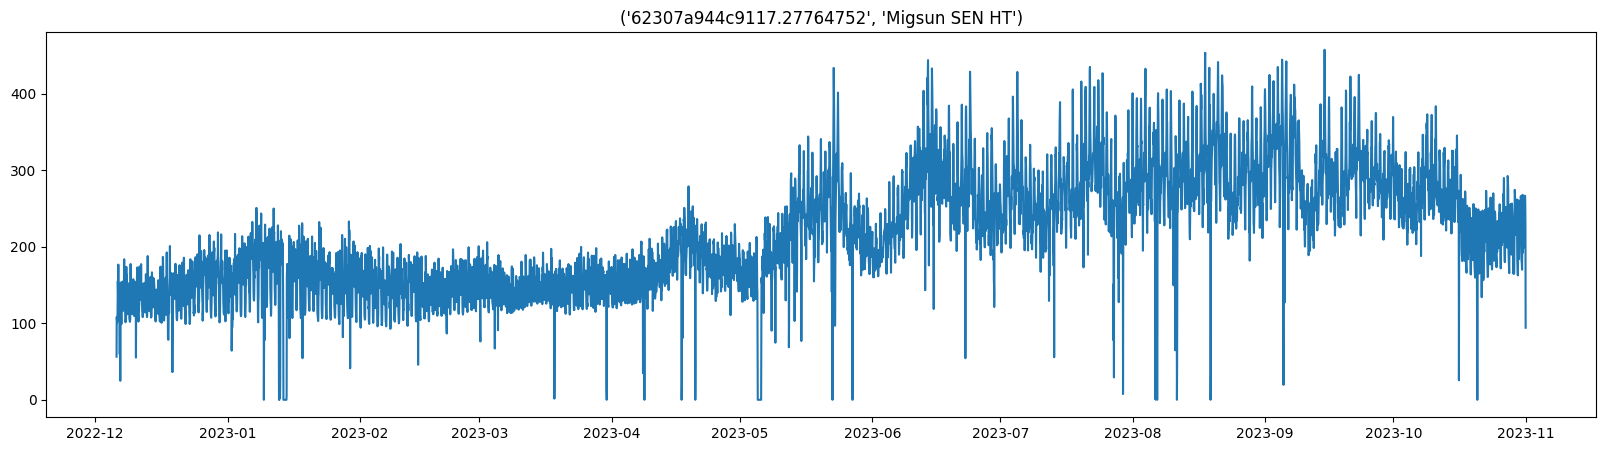

4 zero count= 53 total count= 7921  Migsun SEN HT id= 62307a944c9117.27764752
data  is stationary with score 0.03270753852673228


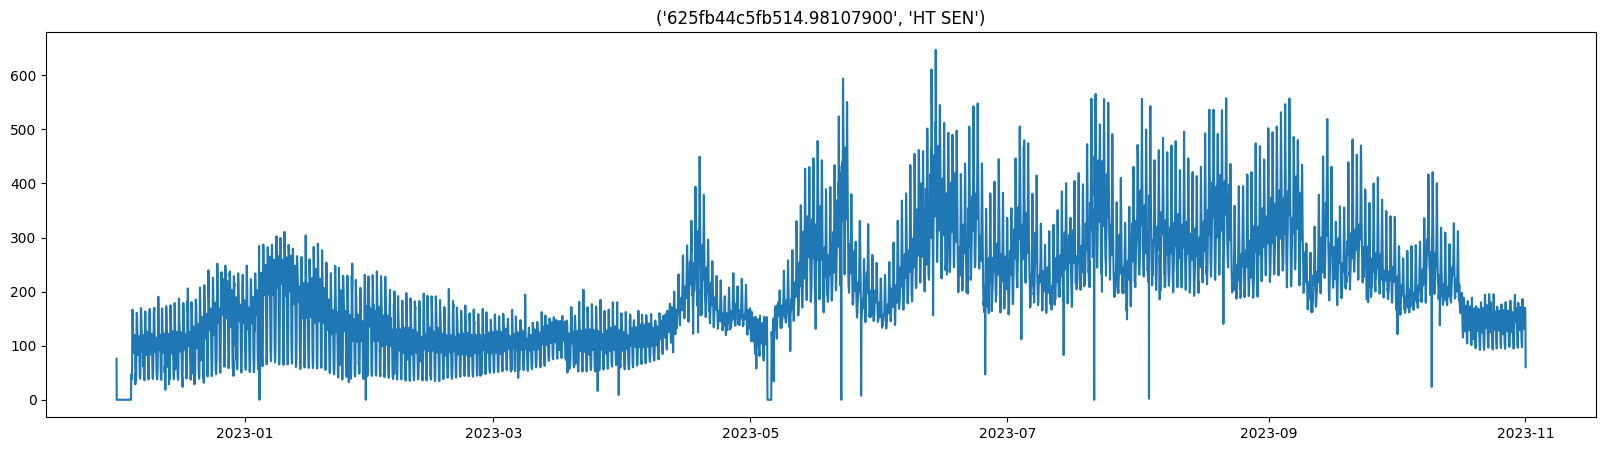

5 zero count= 108 total count= 8029  HT SEN id= 625fb44c5fb514.98107900
data  is stationary with score 0.01548546175261988


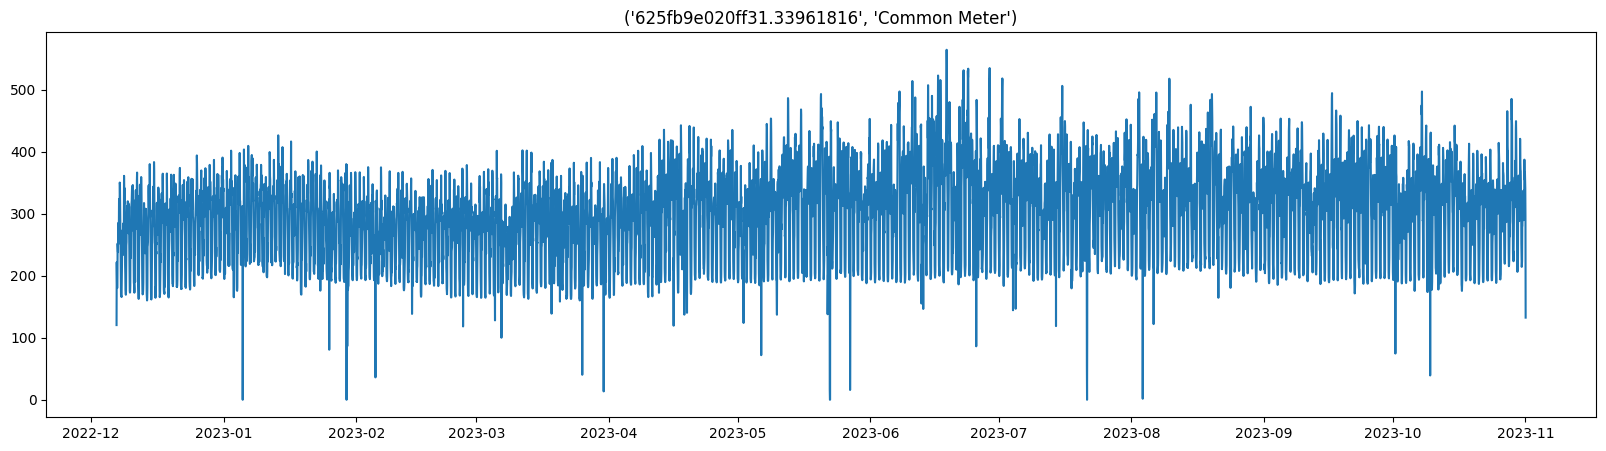

6 zero count= 4 total count= 7898  Common Meter id= 625fb9e020ff31.33961816
data  is stationary with score 1.1387975119425464e-12


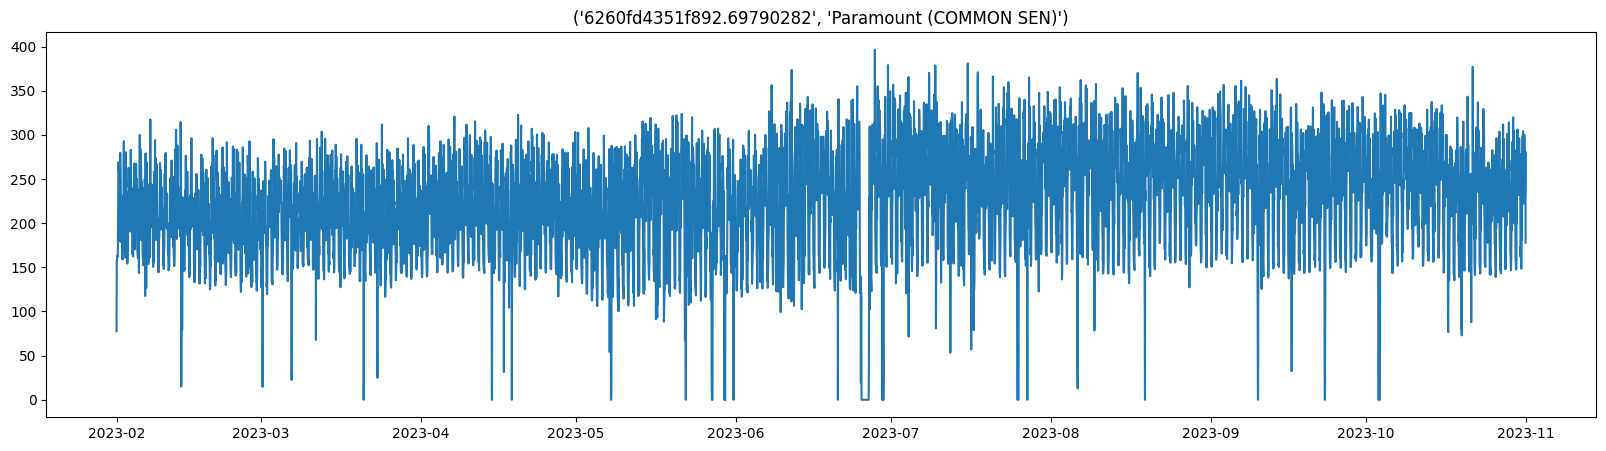

7 zero count= 68 total count= 6553  Paramount (COMMON SEN) id= 6260fd4351f892.69790282
data  is stationary with score 1.4062991448797825e-14


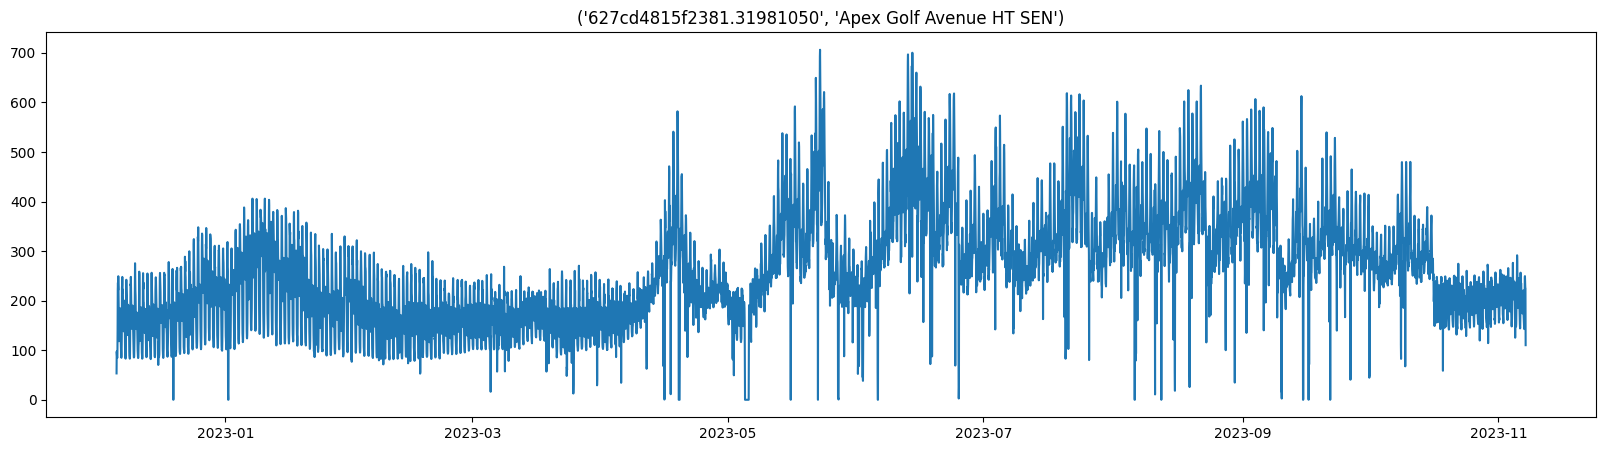

8 zero count= 41 total count= 8077  Apex Golf Avenue HT SEN id= 627cd4815f2381.31981050
data  is stationary with score 0.005519125037693158


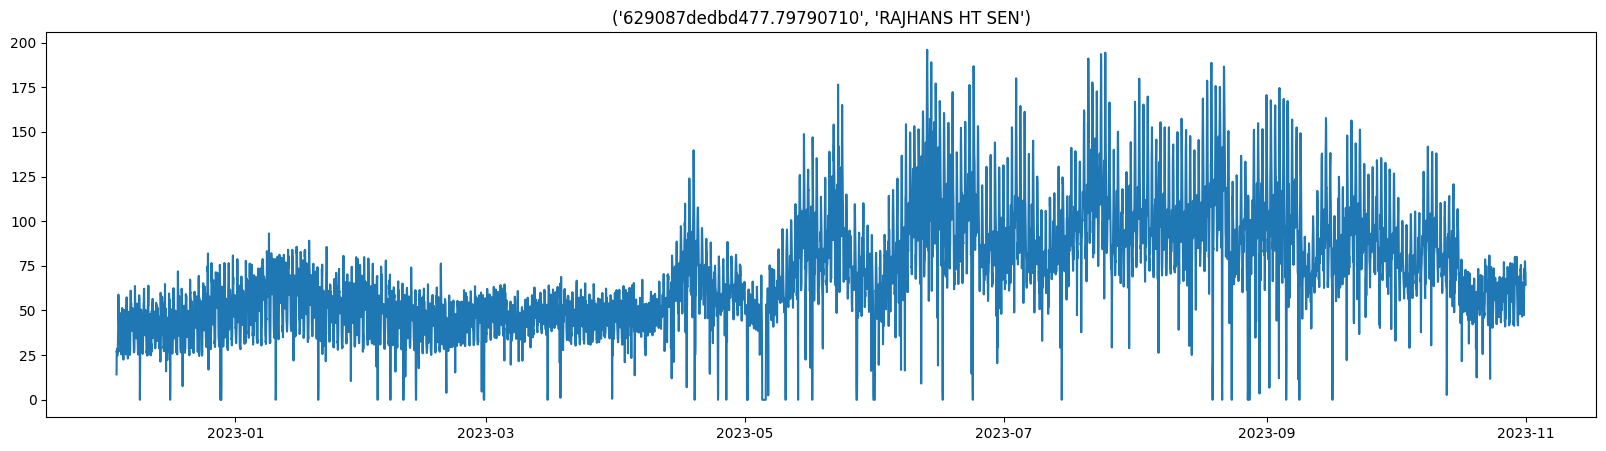

9 zero count= 82 total count= 7969  RAJHANS HT SEN id= 629087dedbd477.79790710
data  is stationary with score 0.013824165780533347


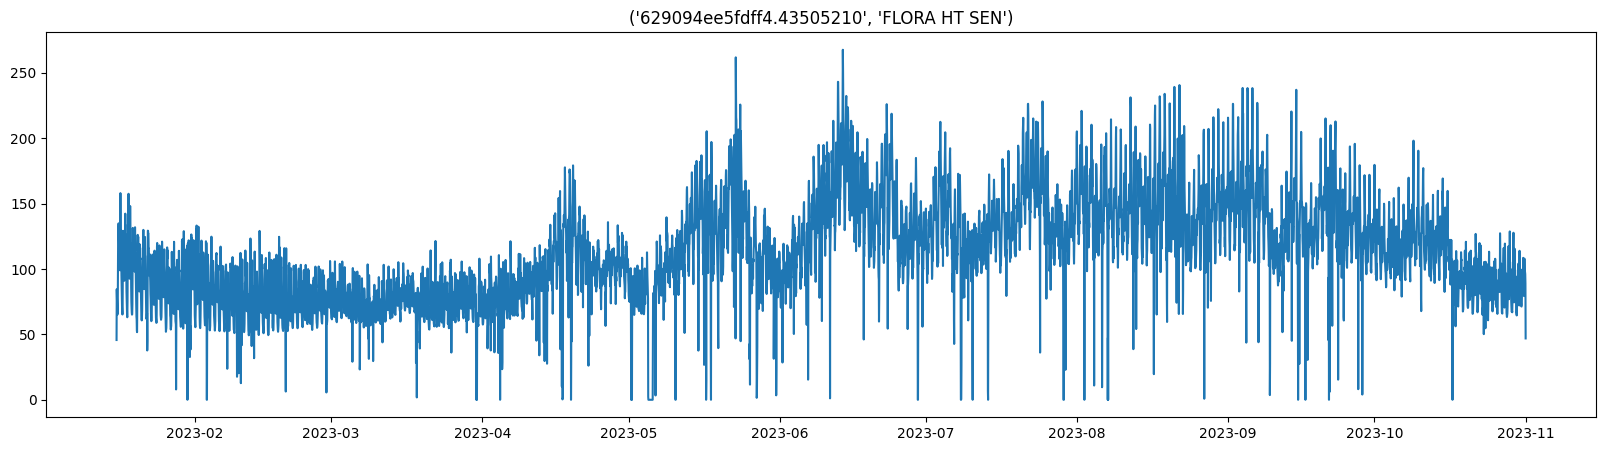

10 zero count= 52 total count= 6937  FLORA HT SEN id= 629094ee5fdff4.43505210
data  is stationary with score 0.008217021326737567


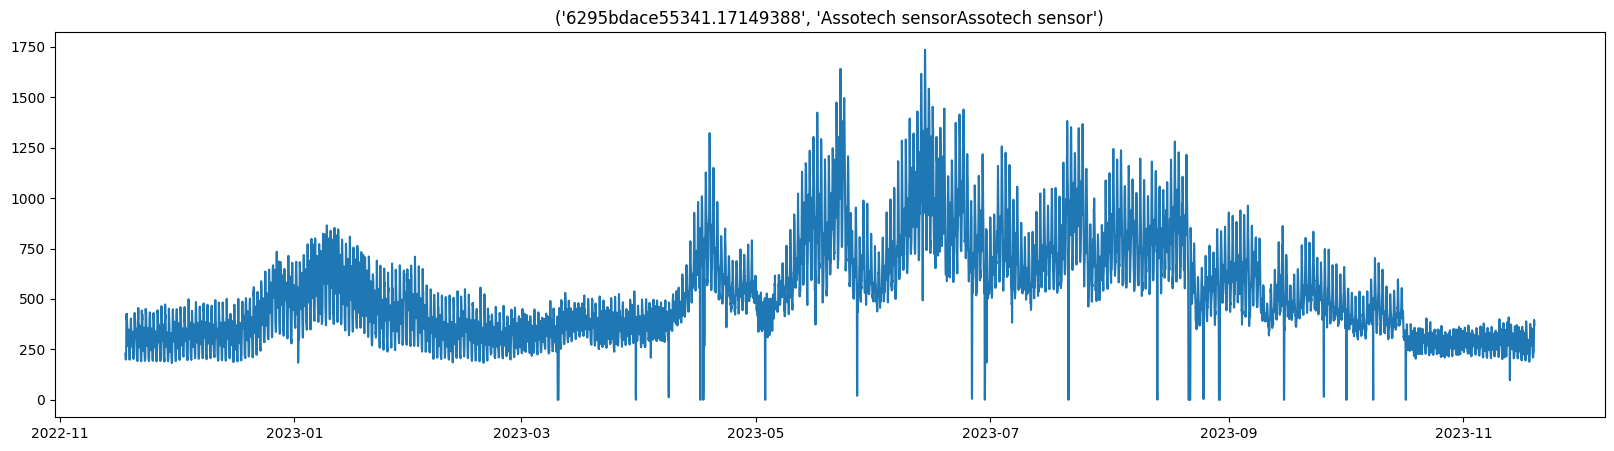

11 zero count= 38 total count= 8796  Assotech sensorAssotech sensor id= 6295bdace55341.17149388
data  is stationary with score 0.03713482075000373


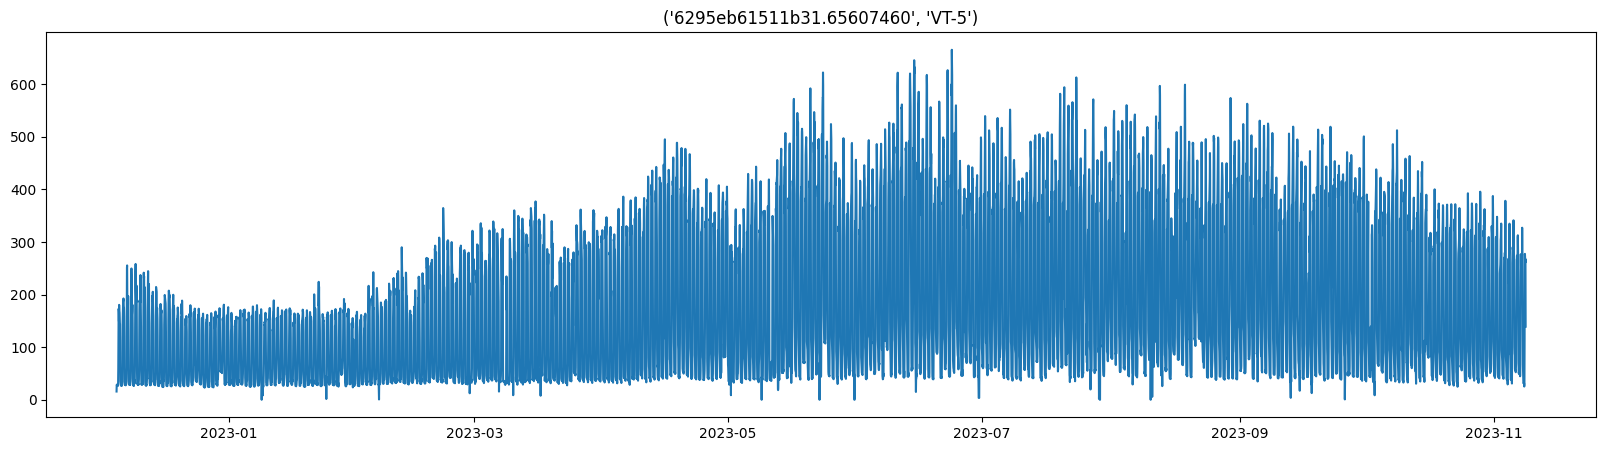

12 zero count= 8 total count= 8129  VT-5 id= 6295eb61511b31.65607460
data  is stationary with score 0.00581649709693465


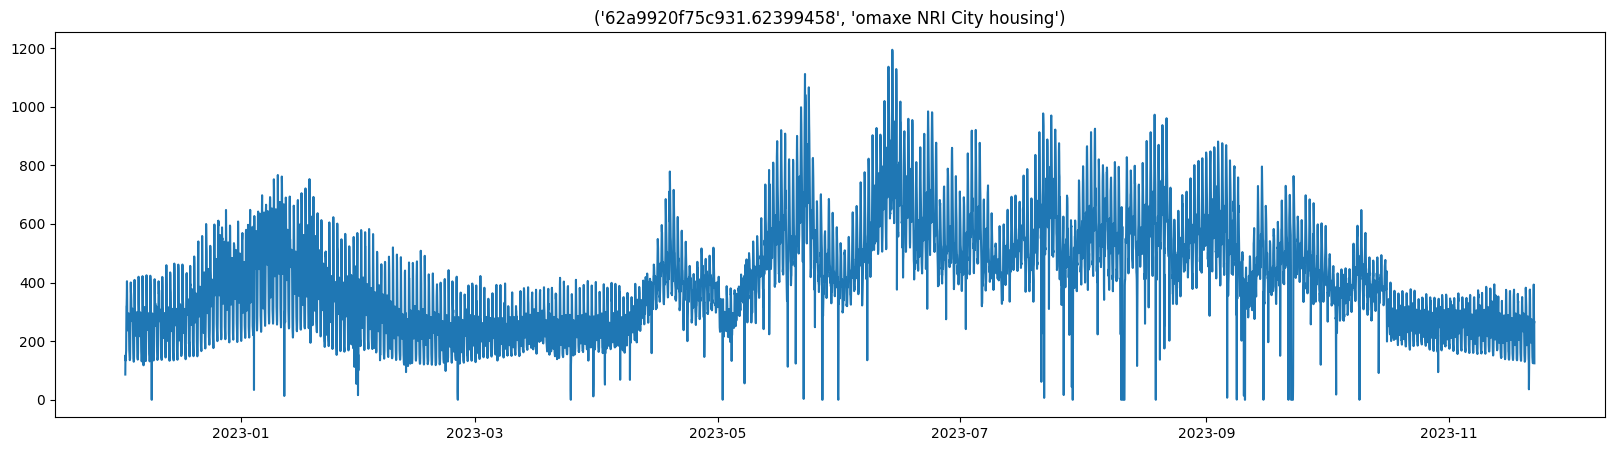

13 zero count= 40 total count= 8509  omaxe NRI City housing id= 62a9920f75c931.62399458
data  is stationary with score 0.011362476330164562


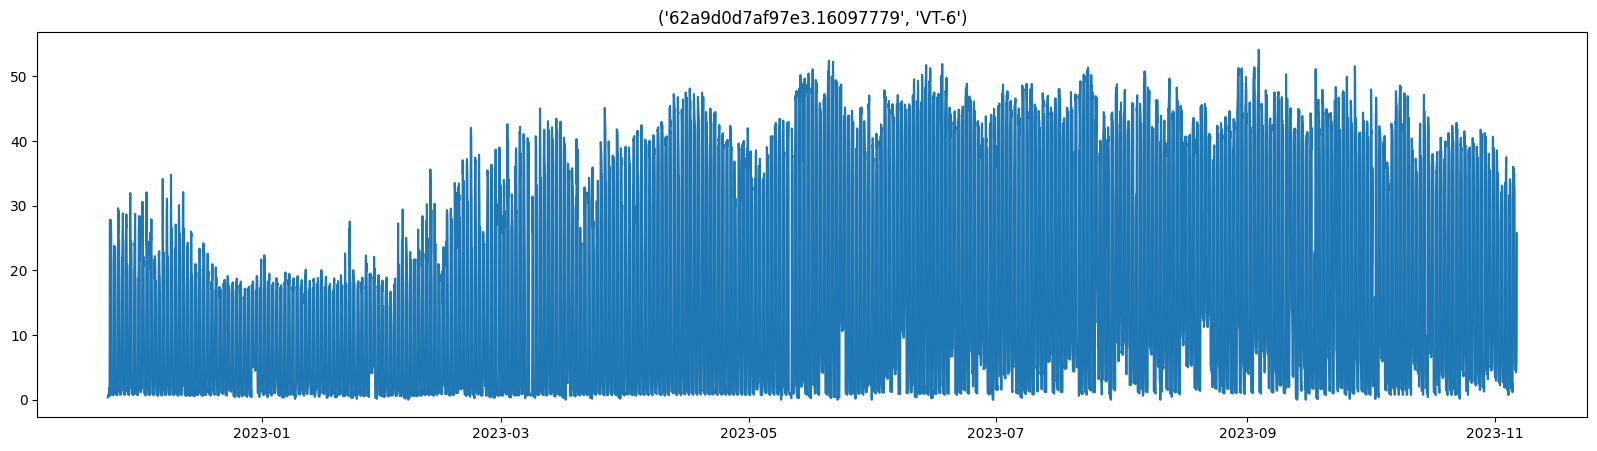

14 zero count= 13 total count= 8340  VT-6 id= 62a9d0d7af97e3.16097779
data  is stationary with score 0.000814239887483925


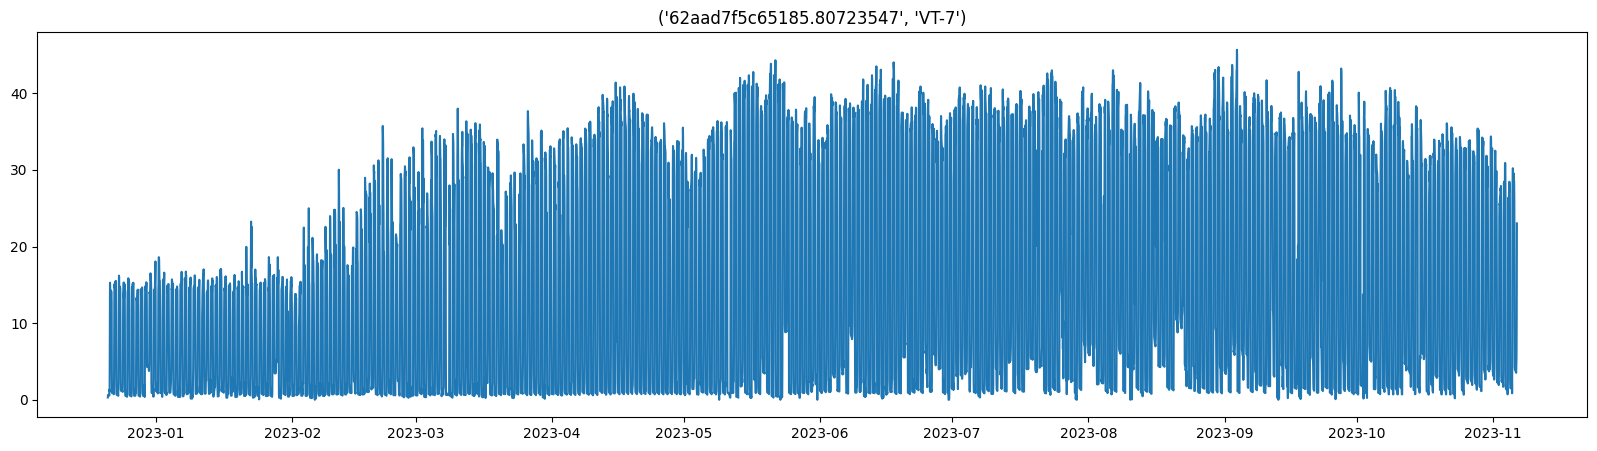

15 zero count= 12 total count= 7692  VT-7 id= 62aad7f5c65185.80723547
data  is stationary with score 0.00010950686320335736


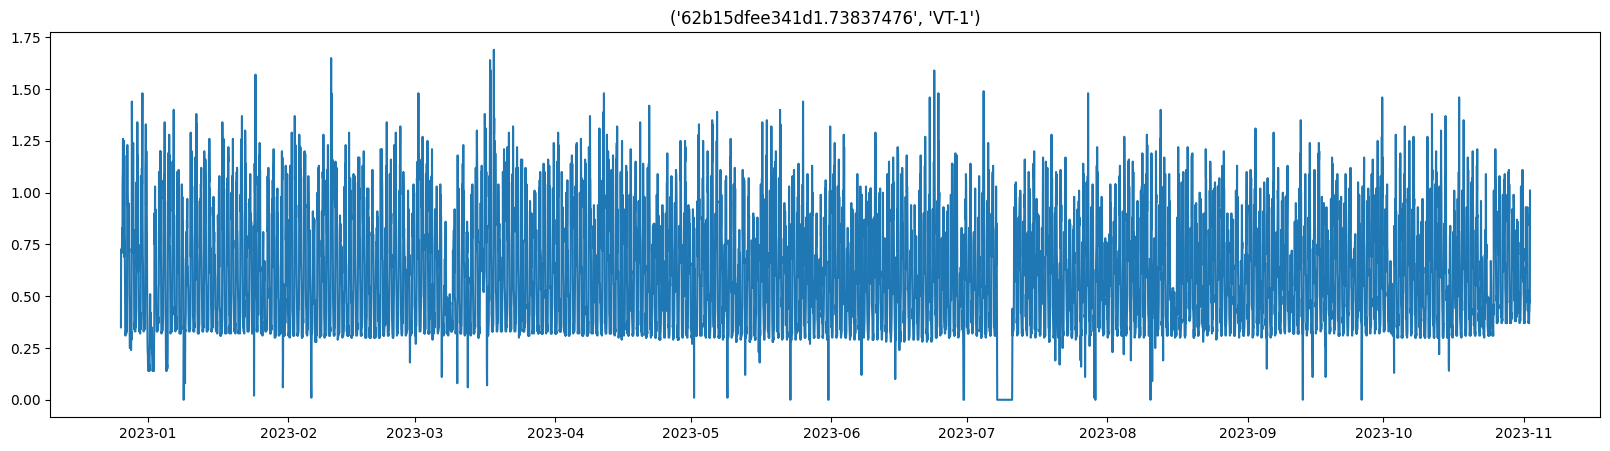

16 zero count= 94 total count= 7475  VT-1 id= 62b15dfee341d1.73837476
data  is stationary with score 5.503587756447997e-19


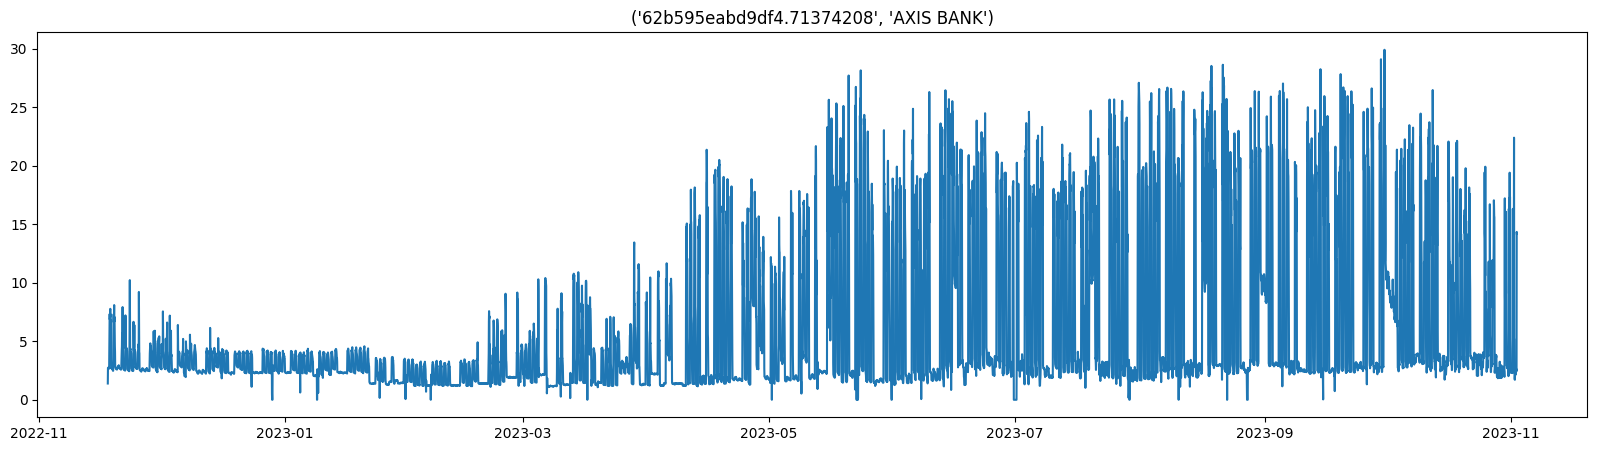

17 zero count= 42 total count= 8387  AXIS BANK id= 62b595eabd9df4.71374208
data  is stationary with score 1.1335730677737143e-13


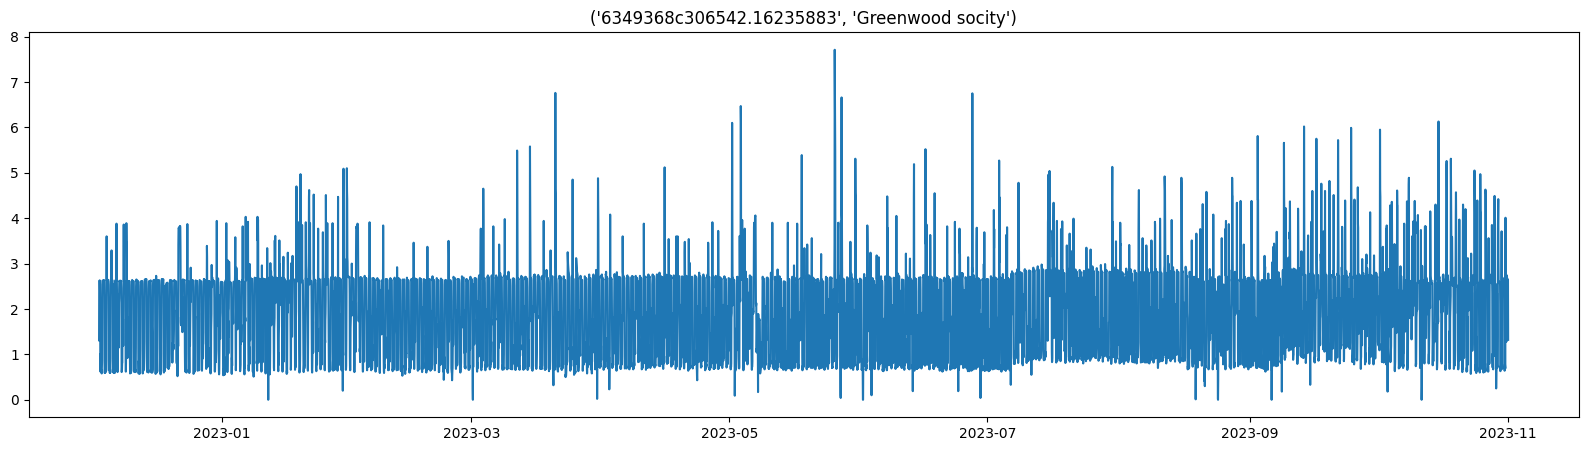

18 zero count= 7 total count= 7996  Greenwood socity id= 6349368c306542.16235883
data  is stationary with score 1.3073359875196943e-23


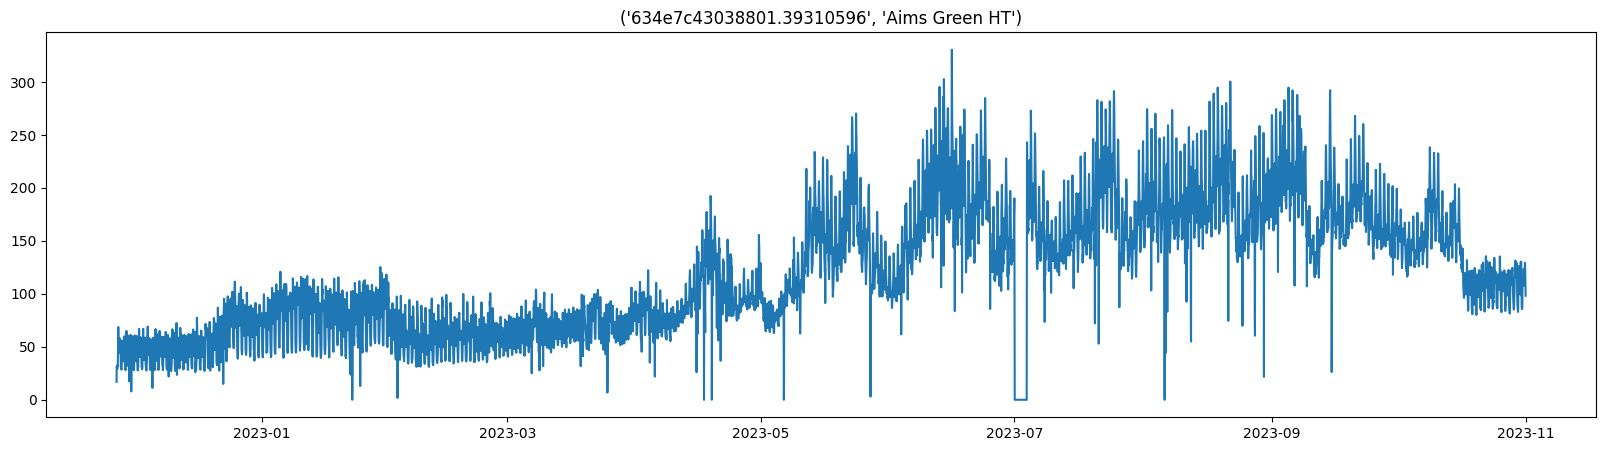

19 zero count= 76 total count= 8137  Aims Green HT id= 634e7c43038801.39310596
data  is stationary with score 0.008127111874229043


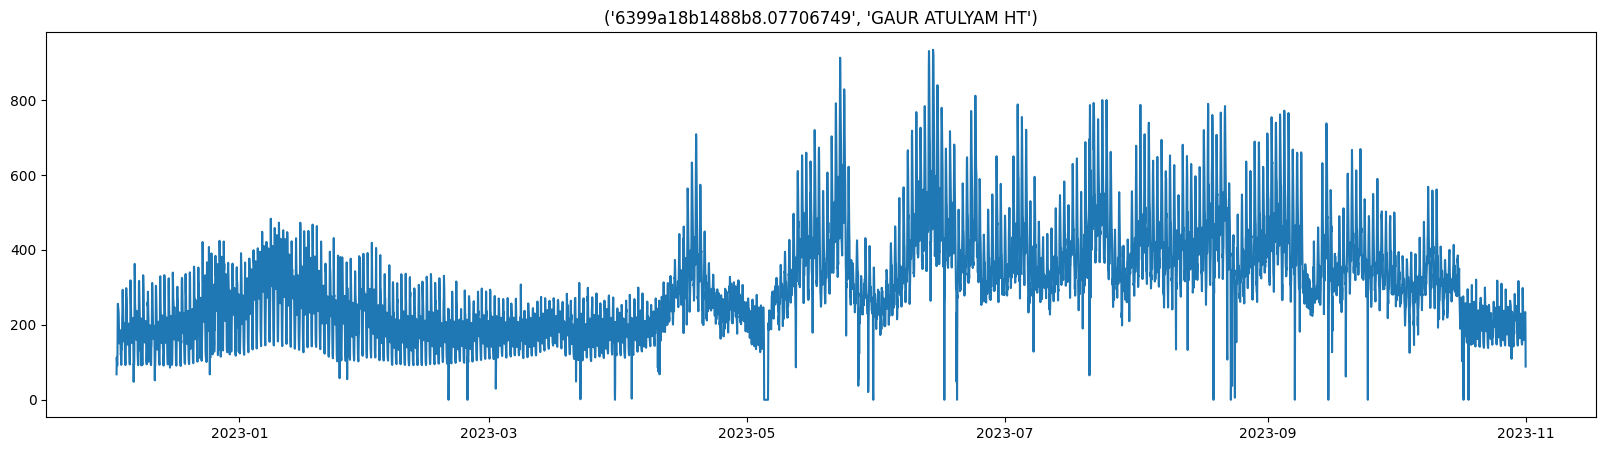

20 zero count= 34 total count= 7993  GAUR ATULYAM HT id= 6399a18b1488b8.07706749
data  is stationary with score 0.007742427862746933


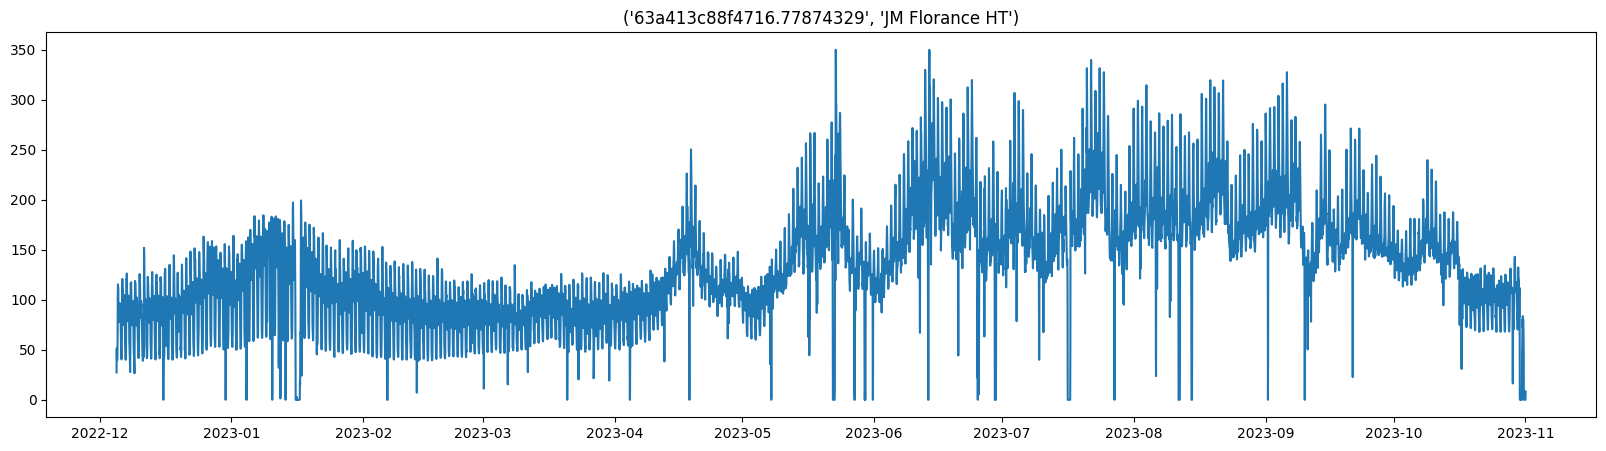

21 zero count= 116 total count= 7946  JM Florance HT id= 63a413c88f4716.77874329
data  is stationary with score 0.0011593176272634339


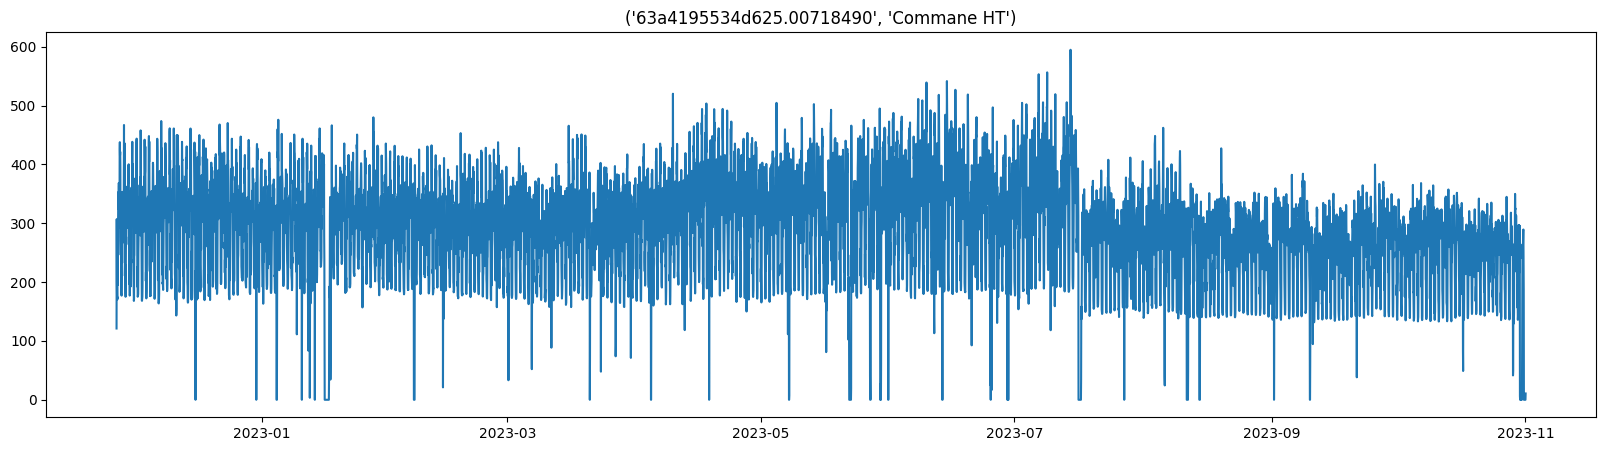

22 zero count= 120 total count= 8138  Commane HT id= 63a4195534d625.00718490
data  is stationary with score 1.0478295934649124e-15


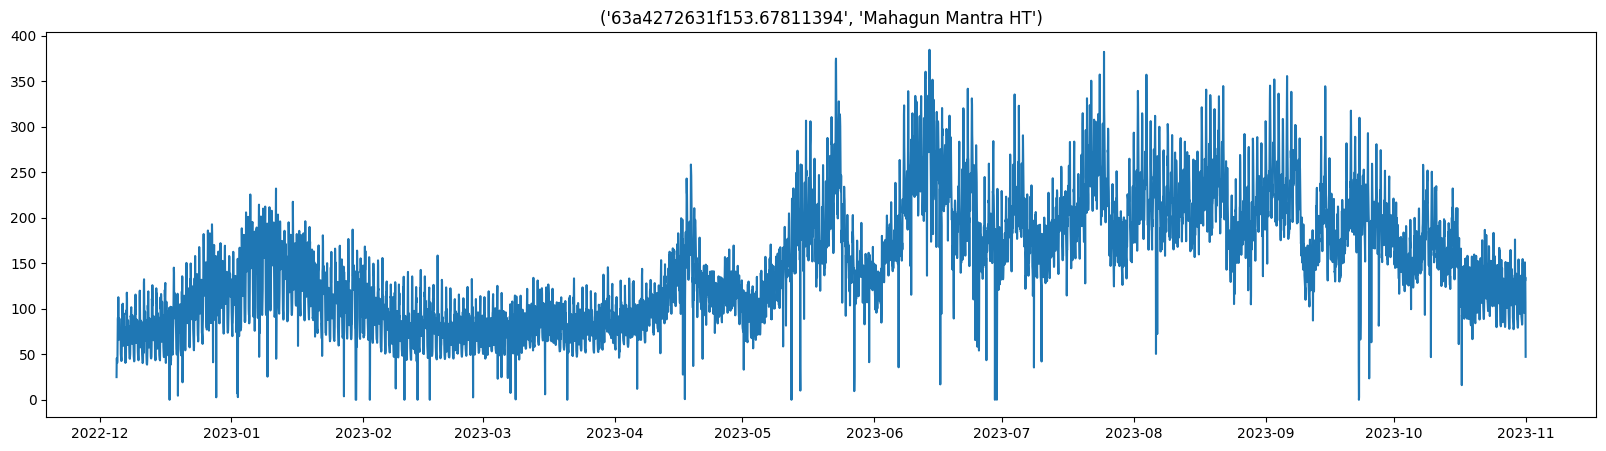

23 zero count= 12 total count= 7945  Mahagun Mantra HT id= 63a4272631f153.67811394
data  is stationary with score 0.02710464964893601


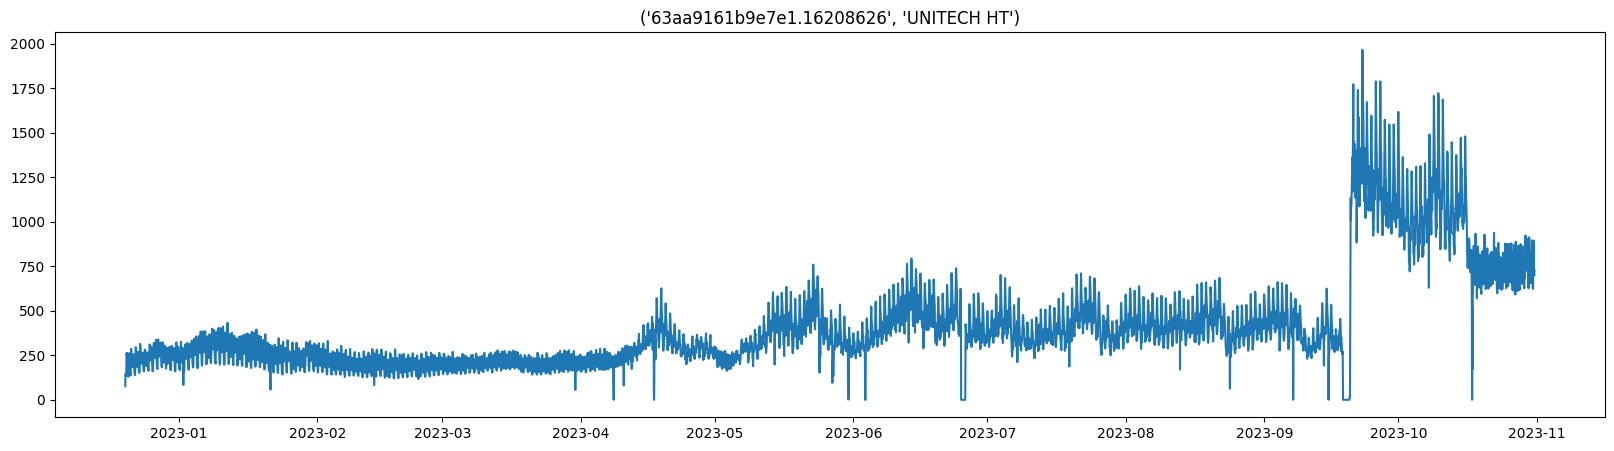

24 zero count= 65 total count= 7572  UNITECH HT id= 63aa9161b9e7e1.16208626
data  is stationary with score 0.009513471496466343


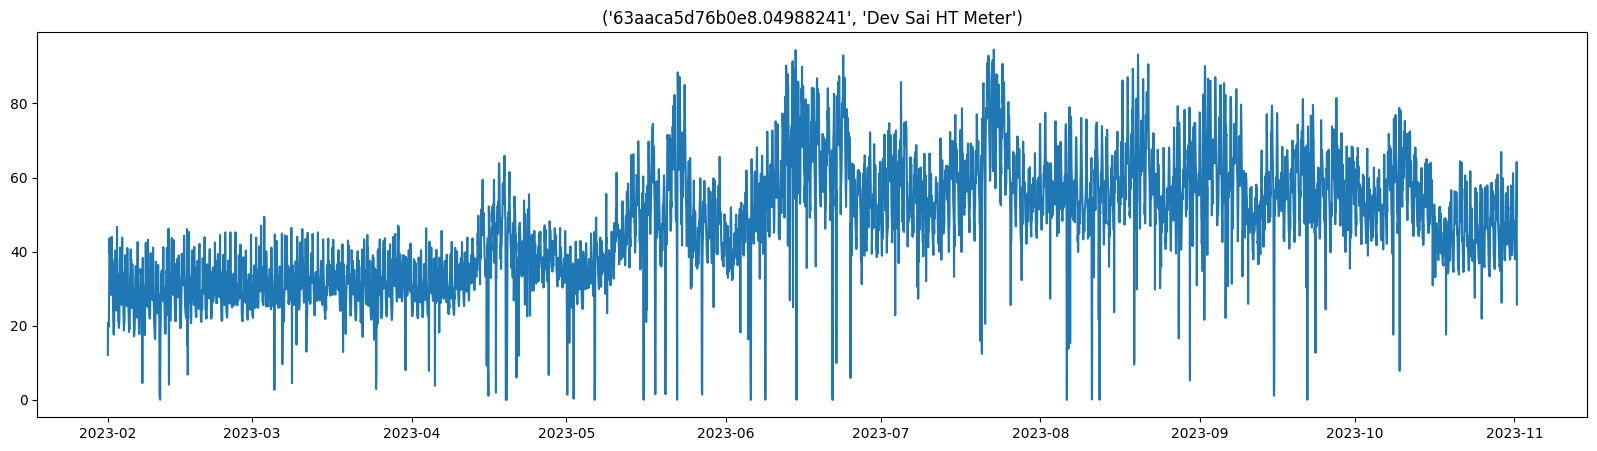

25 zero count= 22 total count= 6565  Dev Sai HT Meter id= 63aaca5d76b0e8.04988241
data  is stationary with score 0.02632521890992312


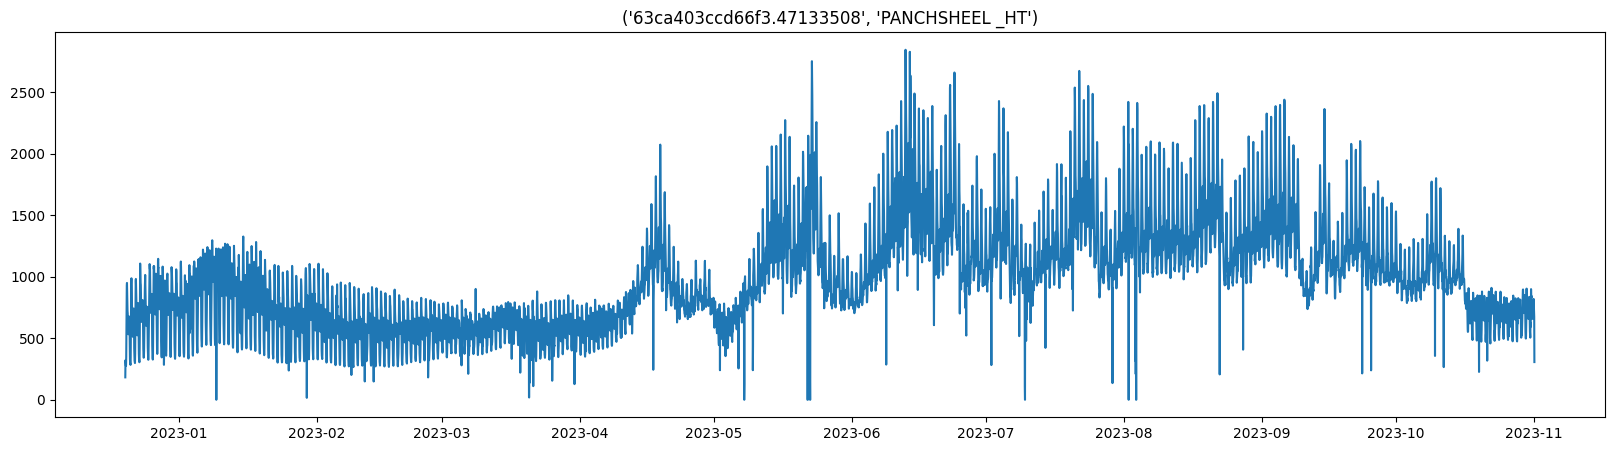

26 zero count= 11 total count= 7586  PANCHSHEEL _HT id= 63ca403ccd66f3.47133508
data  is stationary with score 0.011946457894441228


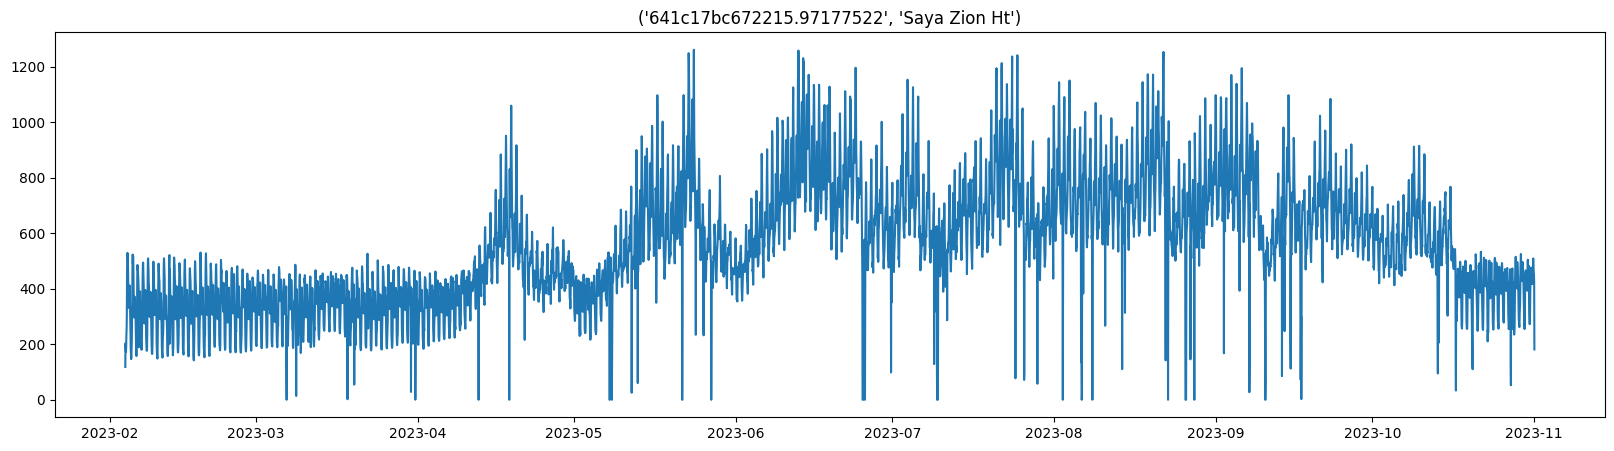

27 zero count= 25 total count= 6482  Saya Zion Ht id= 641c17bc672215.97177522
data  is stationary with score 0.015555075047725998


In [5]:
i=0
lst=[]
for sensor, data in df11:
    df=data
    if (df['Kwh'].nunique())<=1:
        continue
    
    df.drop_duplicates(inplace=True)

#    """ type conversion """
    df['Clock']=pd.to_datetime(df['Clock'])
    df.set_index(['Clock'],inplace=True,drop= True)
#   """ Done"""

#   """ adding name column """
    name_row = df_name[df_name['id'] == sensor]
    selected_name = name_row[['name']]
    df['Name'] = selected_name['name'].iloc[0] if not selected_name.empty else None
#    """ done """

#   '''validation'''
    df = df[df.index >= '2022-11-18 00:00:00']
    # print(len(df))
    filtered_df = df[((df['R_Voltage'] == 0) | (df['Y_Voltage'] == 0) | (df['B_Voltage'] == 0)) & 
                     ((df['R_Current'] == 0) | (df['Y_Current'] == 0) | (df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0
    df.loc[filtered_df.index, :] = filtered_df
#   """" Validation Done """


    df=df.resample(rule="1H").sum()
    
    if len(df)<5000:
        continue


    if len(df)<6000 and len(df)>5000:
        # plt.plot(df['Kwh'])
        # plt.title((sensor,df['Name'].iloc[0]))
        # plt.show()
        continue
    # lst.append((i,"count=",len(df),df['Name'].iloc[0]))
    # print(i,", count=",len(df),",",df['Name'].iloc[0])
    # print(sensor,df['Name'].iloc[0])
    df2=df[(df['Kwh']==0)]
    if len(df2)<200:
        result=adfuller(df['Kwh'],autolag='AIC')
    # print('p-value:', result[1])
        if result[1]<0.05:
            plt.plot(df['Kwh'])
            plt.title((sensor,df['Name'].iloc[0]))
            plt.show()
            print(i,"zero count=",len(df2),"total count=",len(df),"",df['Name'].iloc[0],"id=",sensor)
            print('data  is stationary with score', result[1])
            lst.append(sensor)
            i+=1
    # print(sensor)
    #i+=1
    

In [41]:
lst

['5f718b613291c7.03696209',
 '5f718c439c7a78.65267835',
 '614366bce31a86.78825897',
 '6148740eea9db0.29702291',
 '62307a944c9117.27764752',
 '625fb44c5fb514.98107900',
 '625fb9e020ff31.33961816',
 '6260fd4351f892.69790282',
 '627cd4815f2381.31981050',
 '629087dedbd477.79790710',
 '629094ee5fdff4.43505210',
 '6295bdace55341.17149388',
 '6295eb61511b31.65607460',
 '62a9920f75c931.62399458',
 '62a9d0d7af97e3.16097779',
 '62aad7f5c65185.80723547',
 '62b15dfee341d1.73837476',
 '62b595eabd9df4.71374208',
 '6349368c306542.16235883',
 '634e7c43038801.39310596',
 '6399a18b1488b8.07706749',
 '63a413c88f4716.77874329',
 '63a4195534d625.00718490',
 '63a4272631f153.67811394',
 '63aa9161b9e7e1.16208626',
 '63aaca5d76b0e8.04988241',
 '63ca403ccd66f3.47133508',
 '641c17bc672215.97177522']

In [8]:
df11

In [10]:
dframe.head(1)

sensor               Clock  R_Voltage  Y_Voltage  \
0  5f718b613291c7.03696209 2022-11-18 00:30:00     6579.0     6616.0   

   B_Voltage  R_Current  Y_Current  B_Current  Kwh  
0     6631.0       3.18       3.34       4.88  8.8

In [14]:

means = dframe.groupby('sensor')['Kwh'].mean()

dframe['Mean_Encoded'] = dframe['sensor'].map(means)

print(dframe)


                         sensor               Clock  R_Voltage  Y_Voltage  \
0       5f718b613291c7.03696209 2022-11-18 00:30:00     6579.0     6616.0   
1       5f718b613291c7.03696209 2022-11-18 01:30:00     6605.0     6642.0   
2       5f718b613291c7.03696209 2022-11-18 02:00:00     6644.0     6681.0   
3       5f718b613291c7.03696209 2022-11-18 01:00:00     6595.0     6632.0   
4       5f718b613291c7.03696209 2022-11-18 03:00:00     6656.0     6696.0   
...                         ...                 ...        ...        ...   
856087  65336f58d96214.05717693 2023-11-03 10:30:00     6040.0     6026.0   
856088  65336f58d96214.05717693 2023-11-03 11:00:00     6043.0     6030.0   
856089  65336f58d96214.05717693 2023-11-03 12:00:00     6116.0     6098.0   
856090  65336f58d96214.05717693 2023-11-03 12:30:00     6116.0     6090.0   
856091  65336f58d96214.05717693 2023-11-03 11:30:00     6049.0     6036.0   

        B_Voltage  R_Current  Y_Current  B_Current   Kwh  Mean_Encoded  
0 

In [15]:
dframe['Mean_Encoded'].nunique()

63

In [16]:
dframe['sensor'].nunique()

64

In [ ]:
for items , datafame in df1:
    sensor_df=datafame
    sensor_df['Clock'] = pd.to_datetime(sensor_df['Clock'])
    sensor_df.set_index(['Clock'], inplace=True, drop=True)
    dfresample = sensor_df[['Kwh']].resample(rule='1H').sum()
    


In [ ]:
dfresample.isna().sum()

In [ ]:
lst=[]
stationary_ids=[]
Non_stationary_lst=[]
for items , datafame in df1:
    sensor_df=datafame
    if items=="6149c27b688b43.30226930":
        continue

    filtered_df = sensor_df[(
        (sensor_df['R_Voltage'] == 0) | (sensor_df['Y_Voltage'] == 0) |
        (sensor_df['B_Voltage'] == 0)) & ((sensor_df['R_Current'] == 0) | 
        (sensor_df['Y_Current'] == 0) | (sensor_df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0

    sensor_df.loc[filtered_df.index, :] = filtered_df

    sensor_df['Clock'] = pd.to_datetime(sensor_df['Clock'])
    sensor_df.set_index(['Clock'], inplace=True, drop=True)
    sensor_df = sensor_df[sensor_df.index >= '2022-11-18 00:00:00']
    dfresample = sensor_df[['Kwh']].resample(rule='1H').sum()

    result=adfuller(dfresample['Kwh'],autolag='AIC')
    # print('p-value:', result[1])
    if result[1]<0.05:
        # if (dfresample.isna().sum().sum())==0:
        plt.plot(dfresample['Kwh'])
        plt.title(items)
        plt.show()
        print(items)
        lst.append(dfresample)
        stationary_ids.append(items)

            # stationary_lst.append((items,'data  is stationary with score', result[1]))
    else:
        Non_stationary_lst.append(items)


In [ ]:
len(stationary_lst)

In [ ]:
len(Non_stationary_lst)

In [ ]:
len(lst)

In [ ]:
for i in range(len(lst)):
    df=lst[i]
    df.plot()

In [ ]:
df=stationary_lst[2]
df

In [ ]:
Non_stationary_lst

In [ ]:
dfresample

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,5)

In [ ]:
dframe=pd.read_parquet("D:/Data_Files/NPCL_Data/Pardata.parquet")
df_name=pd.read_excel("D:/Data_Files/NPCL_NAMES.xlsx")

In [ ]:
# df_name[df_name['id']=='65251eeaa2d2a7.47297423',"name"]
filtered_rows = df_name[df_name['id'] == '65251eeaa2d2a7.47297423']
selected_name = filtered_rows[['name']]
selected_name

In [ ]:
type(selected_name)

In [ ]:
df_name['id'].nunique()

In [ ]:
df_name['site_id'].nunique()

In [ ]:
dframe.head(1)

In [ ]:
df

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
df_name=pd.read_excel("D:/Data_Files/NPCL_NAMES.xlsx")
df_name

id              name                  site_id
0   5f718b613291c7.03696209     SS Enclave HT  5f7187d728baf9.07207412
1   5f718c439c7a78.65267835    Royal Court HT  5f6de3495e1d33.21320807
2   61436667efa963.90382379              VT-3  6143357d1da0a3.39934906
3   614366bce31a86.78825897              VT-4  6143357d1da0a3.39934906
4   6148740eea9db0.29702291    Jamia HT METER  61486ffb895734.29992657
..                      ...               ...                      ...
59  65251eeaa2d2a7.47297423  Golf Home Comman  65251d46c07e38.04134359
60  65252007d251c2.73044236    Golf Home Main  65251d46c07e38.04134359
61  6525271cb51398.89708629   O2 vally COMMAN  6525257c76aef3.14642208
62  652529ee234ae1.01233229     O2 vally main  6525257c76aef3.14642208
63  65336f58d96214.05717693     La Galaxia HT  653365cd8daad8.59830897

[64 rows x 3 columns]

In [51]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_name['id'])

print("Encoded Labels:", encoded_labels)
for i , j in df21:
    


# decoded_labels = label_encoder.inverse_transform(encoded_labels)

# print("Decoded Labels:", decoded_labels)

Encoded Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Decoded Labels: ['5f718b613291c7.03696209' '5f718c439c7a78.65267835'
 '61436667efa963.90382379' '614366bce31a86.78825897'
 '6148740eea9db0.29702291' '6149c27b688b43.30226930'
 '6149cfcf096de8.19629797' '61f3acf17477a4.01987013'
 '62307a944c9117.27764752' '625fb44c5fb514.98107900'
 '625fb9e020ff31.33961816' '6260fd4351f892.69790282'
 '627cd4815f2381.31981050' '629087dedbd477.79790710'
 '629094ee5fdff4.43505210' '6295bdace55341.17149388'
 '6295d817a00df1.14373286' '6295eb61511b31.65607460'
 '62a97e33aaa7b4.36322443' '62a9920f75c931.62399458'
 '62a9d0d7af97e3.16097779' '62aad7f5c65185.80723547'
 '62b15dfee341d1.73837476' '62b162f420b668.92415698'
 '62b595eabd9df4.71374208' '6348012ac15341.20338460'
 '6349368c306542.16235883' '63493a1e5535c9.91994860'
 '634e7c43038801.39310596' '63

In [53]:
df_encoded = pd.get_dummies(df_name, columns=['id'], prefix=['id'])
print(df_encoded)

                name                  site_id  id_5f718b613291c7.03696209  \
0      SS Enclave HT  5f7187d728baf9.07207412                        True   
1     Royal Court HT  5f6de3495e1d33.21320807                       False   
2               VT-3  6143357d1da0a3.39934906                       False   
3               VT-4  6143357d1da0a3.39934906                       False   
4     Jamia HT METER  61486ffb895734.29992657                       False   
..               ...                      ...                         ...   
59  Golf Home Comman  65251d46c07e38.04134359                       False   
60    Golf Home Main  65251d46c07e38.04134359                       False   
61   O2 vally COMMAN  6525257c76aef3.14642208                       False   
62     O2 vally main  6525257c76aef3.14642208                       False   
63     La Galaxia HT  653365cd8daad8.59830897                       False   

    id_5f718c439c7a78.65267835  id_61436667efa963.90382379  \
0            

In [50]:
import pandas as pd

In [46]:
df=pd.read_parquet(r"D:\ml_project\HourlyConsumptionPredN\artifacts\data_ingestion/Data.parquet")

In [47]:
df

Empty DataFrame
Columns: [sensor, Clock, R_Voltage, Y_Voltage, B_Voltage, R_Current, Y_Current, B_Current, Kwh]
Index: []

In [59]:
my_dict = {}

for i in range(10):
    my_dict[f'key_{i}'] = i

print(my_dict)


{'key_0': 0, 'key_1': 1, 'key_2': 2, 'key_3': 3, 'key_4': 4, 'key_5': 5, 'key_6': 6, 'key_7': 7, 'key_8': 8, 'key_9': 9}


In [66]:
class name:
    def __init__(self) -> None:
        pass
    def testing(self):
        df=pd.DataFrame({"site_id":[1213,6465,1651],
                         "kwh":[10,25,65]
                        })
        # print(df)
        for i in df['site_id']:
            if i == 6465:
                print(df[df['site_id']==i])
                
        sensor_id=i
    def var(self):
        return self.i

a=name()
a.testing()
a.var()

   site_id  kwh
1     6465   25


AttributeError: 'name' object has no attribute 'i'